Epoch 0, Loss: 4.279361867514358
Epoch 10, Loss: 2.739377846822867
Epoch 20, Loss: 2.479761517760985
Epoch 30, Loss: 2.3770478075196735
Epoch 40, Loss: 2.322855059325756
Epoch 50, Loss: 2.293376671523733
Epoch 60, Loss: 2.2766380066766296
Epoch 70, Loss: 2.266951734165678
Epoch 80, Loss: 2.260946555882988
Epoch 90, Loss: 2.2570274761262694
Epoch 100, Loss: 2.2563724817233846
Epoch 110, Loss: 2.4896573621223452
Epoch 120, Loss: 2.343491212523092
Epoch 130, Loss: 2.261208254873642
Epoch 140, Loss: 2.2545143885040493
Epoch 150, Loss: 2.2523060684885214
Epoch 160, Loss: 2.2513401211469306
Epoch 170, Loss: 2.2524606388165402
Epoch 180, Loss: 2.26523679807186
Epoch 190, Loss: 2.33076966367438
Epoch 200, Loss: 2.324753584443526
Epoch 210, Loss: 2.27068217839952
Epoch 220, Loss: 2.255981478614531
Epoch 230, Loss: 2.252218807887004
Epoch 240, Loss: 2.251299276384416
Epoch 250, Loss: 2.252084156754104
Epoch 260, Loss: 2.254894803627356
Epoch 270, Loss: 2.2604749129605755
Epoch 280, Loss: 2.26804

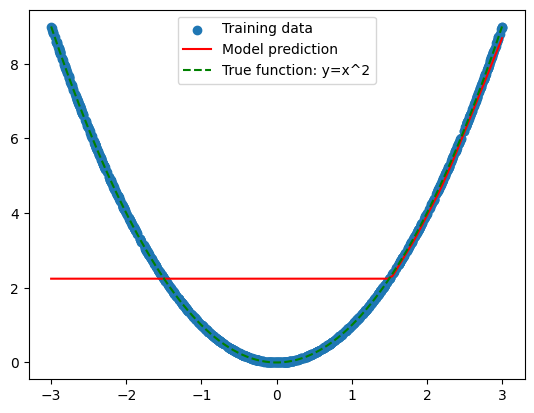

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

# Mean Squared Error function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Derivative of ReLU activation function
def relu_derivative(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

# Training Set
np.random.seed(0)
X_train = np.random.uniform(low=-3, high=3, size=(1000, 1))
y_train = X_train**2

# Neural Network
def forward(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output):
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = np.maximum(0, hidden_input)  # ReLU activation function
    final_output = np.dot(hidden_output, weights_hidden_output) + bias_output
    return final_output, hidden_output

def train(X, y, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, learning_rate=0.01, epochs=1000):
    for epoch in range(epochs):
        # Forward pass
        y_pred, hidden_output = forward(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)

        # Compute loss
        loss = 0.5 * np.mean((y_pred - y)**2)

        # Backward pass
        d_loss = 2 * (y_pred - y) / X.shape[0]
        d_weights_hidden_output = np.dot(hidden_output.T, d_loss)
        d_bias_output = np.sum(d_loss, axis=0, keepdims=True)

        d_hidden = np.dot(d_loss, weights_hidden_output.T)
        d_hidden[hidden_output <= 0] = 0  # Derivative of ReLU

        d_weights_input_hidden = np.dot(X.T, d_hidden)
        d_bias_hidden = np.sum(d_hidden, axis=0, keepdims=True)

        # Update weights and biases
        weights_hidden_output -= learning_rate * d_weights_hidden_output
        bias_output -= learning_rate * d_bias_output
        weights_input_hidden -= learning_rate * d_weights_input_hidden
        bias_hidden -= learning_rate * d_bias_hidden

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

    return weights_input_hidden, bias_hidden, weights_hidden_output, bias_output

# Model configuration
input_size = 1
hidden_size = 10
output_size = 1

# Initialize weights and biases
weights_input_hidden = np.random.rand(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.rand(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Train the model
weights_input_hidden, bias_hidden, weights_hidden_output, bias_output = train(
    X_train, y_train, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output,
    learning_rate=0.01, epochs=1000
)

# Test
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred, _ = forward(X_test, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)

# Plot
plt.scatter(X_train, y_train, label='Training data')
plt.plot(X_test, y_pred, color='red', label='Model prediction')
plt.plot(X_test, X_test**2, color='green', linestyle='dashed', label='True function: y=x^2')
plt.legend()
plt.show()
